In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
from collections import Counter

In [ ]:
df=pd.read_csv('/content/Bird Strikes data.xlsx - Bird Strikes.csv')
df

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,12/30/11 0:00,No damage,...,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,"1,500",0,No
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,12/30/11 0:00,No damage,...,False,NaN,Small,Some Cloud,Tree swallow,Y,0,0,0,No
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaN,No damage,...,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,12/31/11 0:00,No damage,...,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0,0,Yes


In [ ]:
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [ ]:
df.shape

(25558, 26)

In [ ]:
df.dtypes

Record ID                                   int64
Aircraft: Type                             object
Airport: Name                              object
Altitude bin                               object
Aircraft: Make/Model                       object
Wildlife: Number struck                    object
Wildlife: Number Struck Actual              int64
Effect: Impact to flight                   object
FlightDate                                 object
Effect: Indicated Damage                   object
Aircraft: Number of engines?               object
Aircraft: Airline/Operator                 object
Origin State                               object
When: Phase of flight                      object
Conditions: Precipitation                  object
Remains of wildlife collected?               bool
Remains of wildlife sent to Smithsonian      bool
Remarks                                    object
Wildlife: Size                             object
Conditions: Sky                            object


In [ ]:
# converting the date column to date_time dtype
df['FlightDate'] = pd.to_datetime(df['FlightDate'],format='%m/%d/%y %H:%M')

In [ ]:
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [ ]:
df.dtypes

Record ID                                           int64
Aircraft: Type                                     object
Airport: Name                                      object
Altitude bin                                       object
Aircraft: Make/Model                               object
Wildlife: Number struck                            object
Wildlife: Number Struck Actual                      int64
Effect: Impact to flight                           object
FlightDate                                 datetime64[ns]
Effect: Indicated Damage                           object
Aircraft: Number of engines?                       object
Aircraft: Airline/Operator                         object
Origin State                                       object
When: Phase of flight                              object
Conditions: Precipitation                          object
Remains of wildlife collected?                       bool
Remains of wildlife sent to Smithsonian              bool
Remarks       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 2078 non-null   object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

In [ ]:
df.describe()

,Record ID,Wildlife: Number Struck Actual,FlightDate,Number of people injured
count,25558.000000,25558.000000,25429,25558.000000
mean,253916.085609,2.691525,2007-01-22 13:20:40.017303040,0.001056
min,1195.000000,1.000000,2000-01-02 00:00:00,0.000000
25%,225783.750000,1.000000,2004-06-17 00:00:00,0.000000
50%,248749.000000,1.000000,2007-07-29 00:00:00,0.000000
75%,269168.750000,1.000000,2009-11-01 00:00:00,0.000000
max,321909.000000,942.000000,2011-12-31 00:00:00,6.000000
std,38510.453382,12.793975,NaN,0.050420


In [ ]:
# checking for duplicates
df.duplicated().sum()

0

In [ ]:
# checking for null values
df.isnull().sum()

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [ ]:
#Handling missing values

In [ ]:
# treating missing values by imputation
df['Effect: Impact to flight'].fillna("Not Known",inplace=True)
df['Conditions: Precipitation'].fillna("Not Known",inplace=True)
df['Remarks'].fillna("No Remarks",inplace=True)
df['Airport: Name'].fillna("Unknown",inplace=True)
df['Origin State'].fillna("Unknown",inplace=True)
df['Aircraft: Airline/Operator'].fillna("Unknown",inplace=True)
df['Altitude bin'].fillna("Unknown",inplace=True)

In [ ]:
# treating null values with most frequent values
df['Aircraft: Type'].fillna(df['Aircraft: Type'].value_counts().index[0],inplace=True)
df['Wildlife: Number struck'].fillna(df['Wildlife: Number struck'].value_counts().index[0],inplace=True)
df['Aircraft: Number of engines?'].fillna(df['Aircraft: Number of engines?'].value_counts().index[0],inplace=True)
df['Is Aircraft Large?'].fillna(df['Is Aircraft Large?'].value_counts().index[0],inplace=True)
df['Pilot warned of birds or wildlife?'].fillna(df['Pilot warned of birds or wildlife?'].value_counts().index[0],inplace=True)
df['When: Phase of flight'].fillna(df['When: Phase of flight'].value_counts().index[0],inplace=True)
df['Wildlife: Size'].fillna(df['Wildlife: Size'].value_counts().index[0],inplace=True)
df['Feet above ground'].fillna(df['Feet above ground'].value_counts().index[0],inplace=True)

In [ ]:
# filling null values with succeeding values
df['FlightDate'].fillna(method='ffill', inplace=True)

In [ ]:
# df.isnull().sum()  dataset cleaned

Record ID                                  0
Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
Effect: Impact to flight                   0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Conditions: Precipitation                  0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Remarks                                    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Tota

In [ ]:
df

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,Not Known,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,Not Known,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,Not Known,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,Not Known,2011-12-30,No damage,...,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,"1,500",0,No
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,Not Known,2011-12-30,No damage,...,False,No Remarks,Small,Some Cloud,Tree swallow,Y,0,0,0,No
25555,319680,Airplane,Unknown,Unknown,EC-135,1,1,Not Known,2011-12-30,No damage,...,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,Small,No Cloud,Unknown bird - small,N,0,0,0,No
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,Not Known,2011-12-31,No damage,...,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0,0,Yes


In [ ]:
# df.nunique()    checking for no. of unique values in each category

Record ID                                  25558
Aircraft: Type                                 1
Airport: Name                               1110
Altitude bin                                   3
Aircraft: Make/Model                         351
Wildlife: Number struck                        4
Wildlife: Number Struck Actual               106
Effect: Impact to flight                       5
FlightDate                                  4225
Effect: Indicated Damage                       2
Aircraft: Number of engines?                   5
Aircraft: Airline/Operator                   293
Origin State                                  61
When: Phase of flight                          7
Conditions: Precipitation                      8
Remains of wildlife collected?                 2
Remains of wildlife sent to Smithsonian        2
Remarks                                    18187
Wildlife: Size                                 3
Conditions: Sky                                3
Wildlife: Species   

In [ ]:
# checking for unique values in certain categories

In [ ]:
df['Altitude bin'].unique()

array(['> 1000 ft', '< 1000 ft', 'Unknown'], dtype=object)

In [ ]:
df['Effect: Impact to flight'].unique()

array(['Engine Shut Down', 'Not Known', 'Precautionary Landing', 'Other',
       'Aborted Take-off'], dtype=object)

In [ ]:
df['Wildlife: Size'].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [ ]:
df['Conditions: Sky'].unique()

array(['No Cloud', 'Some Cloud', 'Overcast'], dtype=object)

In [ ]:
df['Effect: Indicated Damage'].unique()

array(['Caused damage', 'No damage'], dtype=object)

In [ ]:
df['Number of people injured'].unique()

array([0, 2, 1, 6])

In [ ]:
df['Effect: Impact to flight'].unique()

array(['Engine Shut Down', 'Not Known', 'Precautionary Landing', 'Other',
       'Aborted Take-off'], dtype=object)

In [ ]:
df.head(4)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,Not Known,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,Not Known,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes


In [ ]:
# Which state has the most bird strikes?
state_counts=df['Origin State'].value_counts()
state_with_most_strikes = state_counts.idxmax()
most_strikes_count = state_counts.max()

In [ ]:
state_with_most_strikes

'California'

<Axes: xlabel='Origin State'>

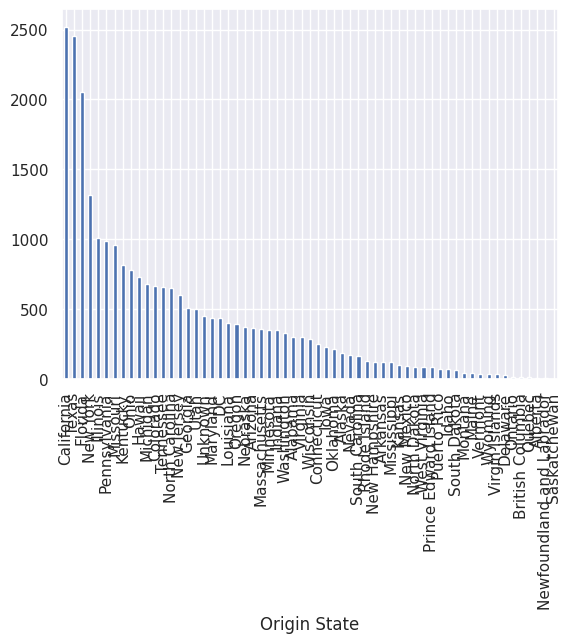

In [ ]:
df['Origin State'].value_counts().plot(kind = "bar")

In [ ]:
# Which size of wildlife mostly caused the strikes and how many times?
size_counts =df['Wildlife: Size'].value_counts()
most_common_size = size_counts.idxmax()
most_common_size_count = size_counts.max()

In [ ]:
most_common_size

'Small'

In [ ]:
# In which sky conditions did most strikes took place?
sky_conditions_counts =df['Conditions: Sky'].value_counts()
most_common_sky_condition = sky_conditions_counts.idxmax()
most_common_sky_condition_count = sky_conditions_counts.max()

In [ ]:
most_common_sky_condition

'No Cloud'

<Axes: xlabel='Conditions: Sky'>

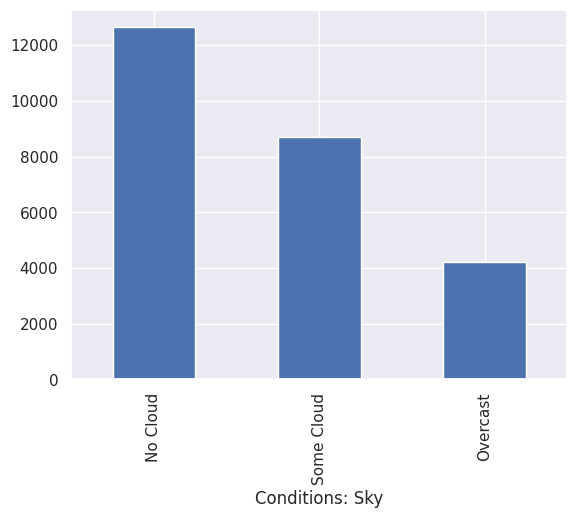

In [ ]:
df['Conditions: Sky'].value_counts().plot(kind = "bar")

<Axes: xlabel='Wildlife: Size'>

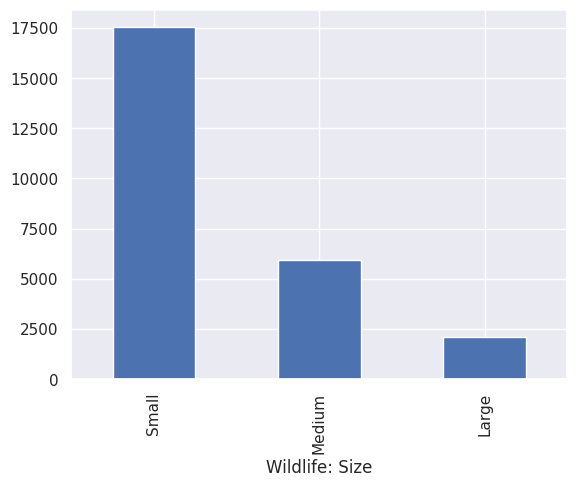

In [ ]:
df['Wildlife: Size'].value_counts().plot(kind = "bar")

In [ ]:
# Airports with most birdstrikes in each state
airport_counts = df.groupby(['Origin State', 'Airport: Name']).size().reset_index(name='BirdStrikeCount')
most_strikes_per_state = airport_counts.groupby('Origin State').apply(lambda x: x.nlargest(1, 'BirdStrikeCount'))
most_strikes_per_state

,,Origin State,Airport: Name,BirdStrikeCount
Origin State,,,,
Alabama,3,Alabama,BIRMINGHAM-SHUTTLESWORTH INTL,211
Alaska,47,Alaska,TED STEVENS ANCHORAGE INTL,50
Alberta,54,Alberta,CALGARY INTL,3
Arizona,71,Arizona,PHOENIX SKY HARBOR,196
Arkansas,81,Arkansas,ADAMS FIELD ARPT,67
...,...,...,...,...
Virginia,1061,Virginia,NORFOLK INTL,103
Washington,1084,Washington,SEATTLE-TACOMA INTL,137
West Virginia,1104,West Virginia,YEAGER ARPT,32


In [ ]:
# How many bird strikes happened per year?
df['Year'] = df['FlightDate'].dt.year
accidents_per_year= df.groupby('Year').size()
accidents_per_year

Year
2000    1371
2001    1236
2002    1688
2003    1570
2004    1696
2005    1856
2006    2161
2007    2308
2008    2269
2009    3262
2010    3149
2011    2992
dtype: int64

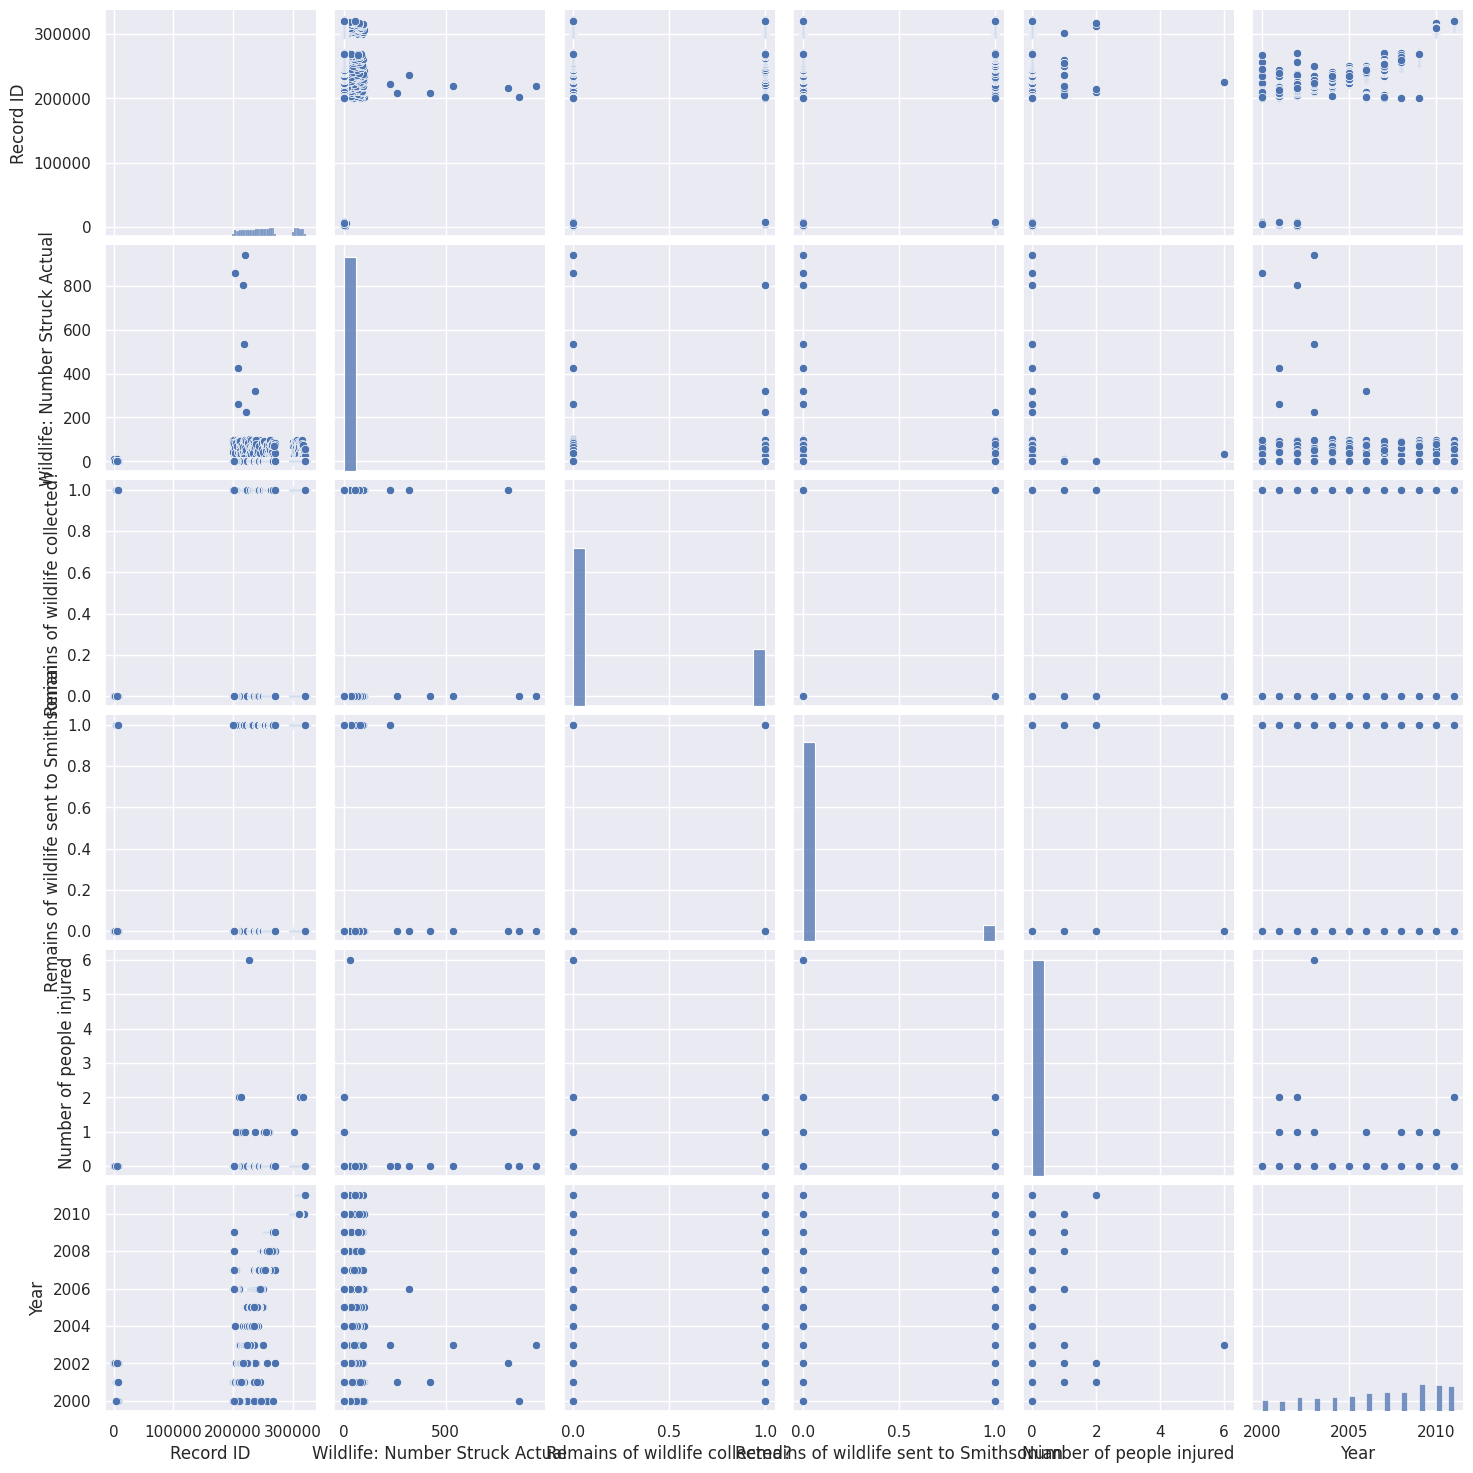

In [ ]:
sns.pairplot(data=df)

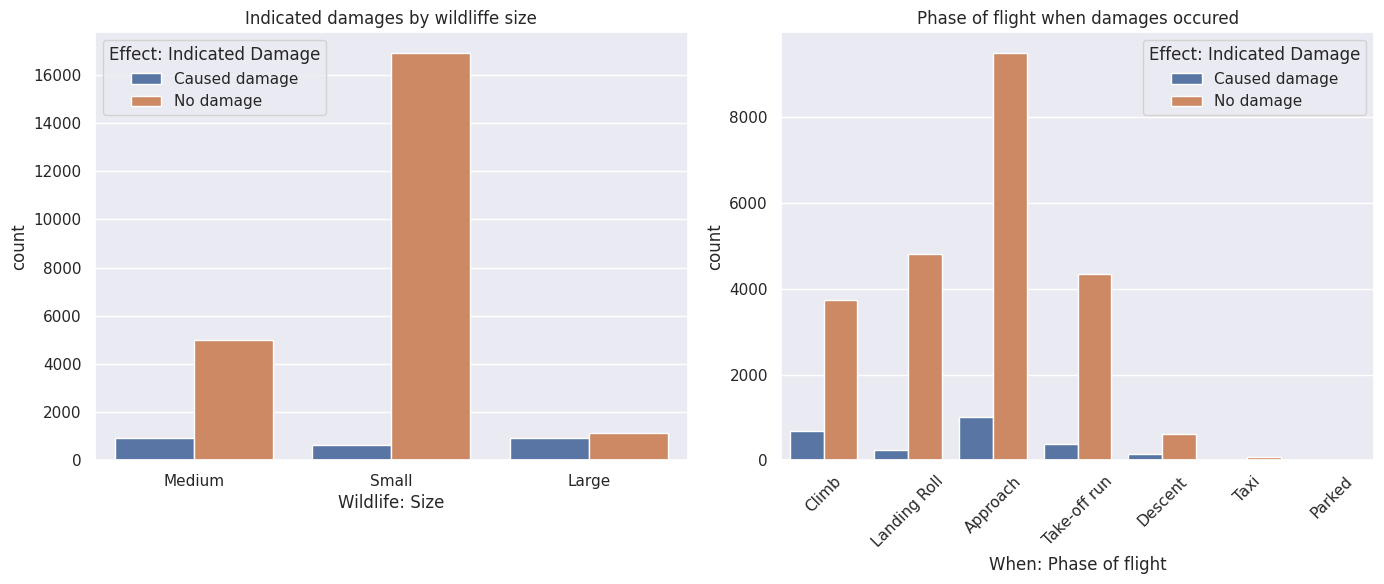

In [ ]:
# subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))


sns.countplot(x='Wildlife: Size', hue='Effect: Indicated Damage', data=df, ax=axes[0])
axes[0].set_title('Indicated damages by wildliffe size')

sns.countplot(x='When: Phase of flight', hue='Effect: Indicated Damage', data=df, ax=axes[1])
axes[1].set_title('Phase of flight when damages occured')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
# most damages are caused by small aircrafts in the approaching phase of the flight

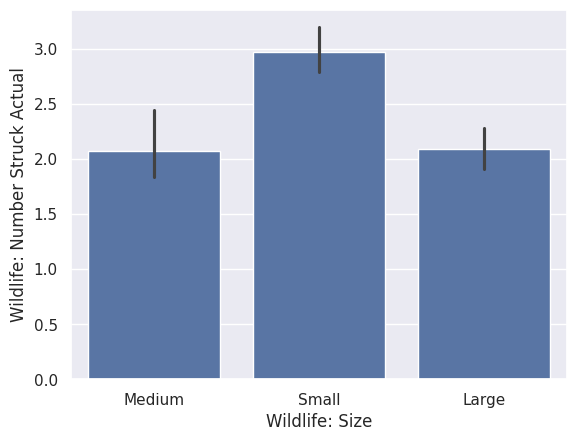

In [ ]:
sns.barplot(data=df,x='Wildlife: Size',y='Wildlife: Number Struck Actual')
plt.show()


In [ ]:
# showing altitude ranges
Altitude_range=df.groupby('Altitude bin')['Wildlife: Number Struck Actual'].sum().to_frame().reset_index()
Altitude_range

,Altitude bin,Wildlife: Number Struck Actual
0,< 1000 ft,59802
1,> 1000 ft,8847
2,Unknown,141


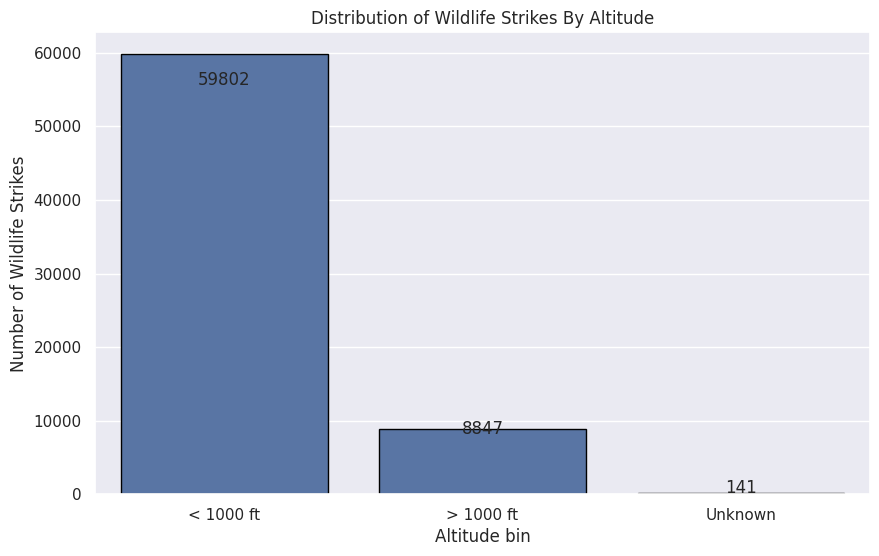

In [ ]:
# on which altitude most strikes happened
plt.figure(figsize=(10, 6))
bar= sns.barplot(x='Altitude bin', y='Wildlife: Number Struck Actual',
data=Altitude_range, edgecolor='black')
for i,height in enumerate(Altitude_range['Wildlife: Number Struck Actual']):
     plt.text(i,height -(0.07*height),str(height),ha='center')
plt.xlabel('Altitude bin')
plt.ylabel('Number of Wildlife Strikes')
plt.title('Distribution of Wildlife Strikes By Altitude')

plt.show()
# most strikes hppened below 1000 feet

In [ ]:
Wildlife_struck=df.groupby('Wildlife: Number struck')['Wildlife: Number Struck Actual'].sum().to_frame().reset_index()
Wildlife_struck

,Wildlife: Number struck,Wildlife: Number Struck Actual
0,1,20931
1,11 to 100,17630
2,2 to 10,25853
3,Over 100,4376


Text(0.5, 1.0, 'Total No. of Birds struck on each Category')

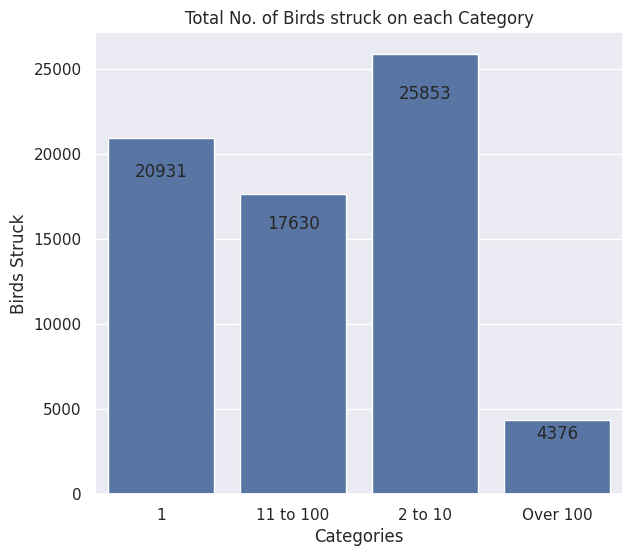

In [ ]:
# total no. of bird strike in each category
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
bar=sns.barplot(data=Wildlife_struck,x='Wildlife: Number struck',
y='Wildlife: Number Struck Actual')

for i, height in enumerate(Wildlife_struck['Wildlife: Number Struck Actual']):
            plt.text(i,height -(0.07 * height),str(height),ha='center',va='top')

plt.xlabel('Categories')
plt.ylabel('Birds Struck')
plt.title('Total No. of Birds struck on each Category')
# most strikes happened in the 2-10 category

In [ ]:
Wildlife_struck_count=df.groupby('Wildlife: Number struck')['Wildlife: Number Struck Actual'].count().to_frame().reset_index()
Wildlife_struck_count

,Wildlife: Number struck,Wildlife: Number Struck Actual
0,1,20919
1,11 to 100,312
2,2 to 10,4319
3,Over 100,8


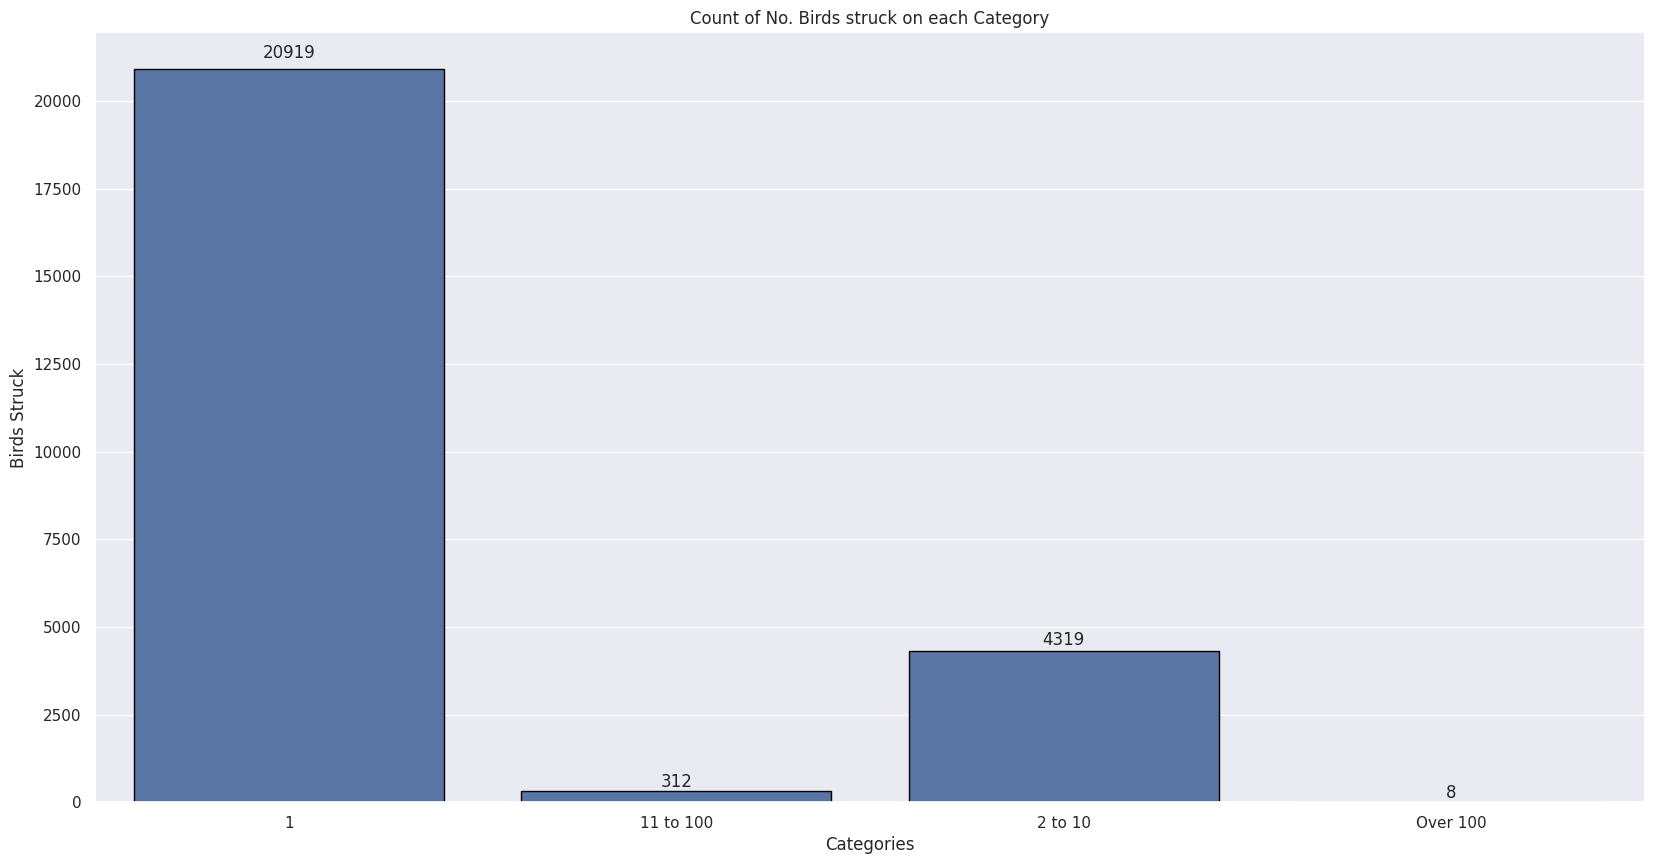

In [ ]:
# count of bird strikes per category
plt.figure(figsize=(20,10))
bar=sns.barplot(data=Wildlife_struck_count,x='Wildlife: Number struck',
                y='Wildlife: Number Struck Actual',edgecolor='black')
for j, height in enumerate(Wildlife_struck_count['Wildlife: Number Struck Actual']):
      plt.text(j,height +(0.01 * height),str(height),ha='center',va='bottom')

plt.xlabel('Categories')
plt.ylabel('Birds Struck')
plt.title('Count of No. Birds struck on each Category')
plt.show()

In [ ]:
# top 10 aircraft models struck
Aircraft_model=df.groupby('Aircraft: Make/Model')['Wildlife: Number Struck Actual'].sum().to_frame().reset_index()
Top_10_model_struck=Aircraft_model.sort_values(by='Wildlife: Number Struck Actual',ascending=False).head(10)
Top_10_model_struck
# most struck model CL-RJ100/200

,Aircraft: Make/Model,Wildlife: Number Struck Actual
152,CL-RJ100/200,5878
38,B-737-300,5202
42,B-737-700,4882
6,A-320,3103
39,B-737-400,2876
5,A-319,2740
51,B-757-200,2565
203,EMB-145,2441
277,MD-80,1687
278,MD-82,1516


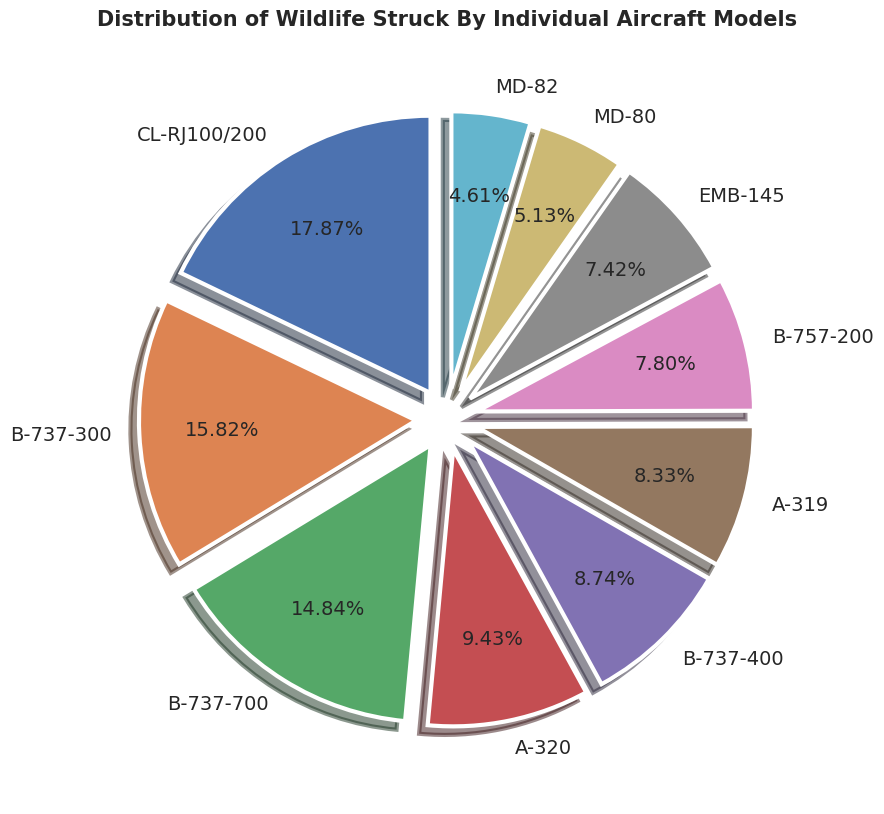

In [ ]:
# strikes over each aircraft model
plt.figure(figsize=(25,10))
sns.set(rc={'figure.facecolor':'#FFFFFF'})
explodes=[0.1]*10
plt.pie(Top_10_model_struck['Wildlife: Number Struck Actual'],
labels=Top_10_model_struck['Aircraft: Make/Model'],
 radius=0.9,explode=explodes,autopct='%0.2f%%',pctdistance=0.7,
shadow=True,labeldistance=1.1,startangle=90,
textprops={'fontsize':14},
wedgeprops={'linewidth':3})
plt.title('Distribution of Wildlife Struck By Individual Aircraft Models',
fontweight='bold',fontsize=15)
plt.show()
# The pie chart shows the models with the highest no. of birds struck by each Aircraft models, as the highest no. of birds struck by the model is CL-RJ100/200 with count of "5878". and share 17.87% of the top 10 models in the chart.

In [ ]:
Size=df.groupby('Wildlife: Size')['Number of people injured'].sum().to_frame().reset_index()
Size

,Wildlife: Size,Number of people injured
0,Large,10
1,Medium,5
2,Small,12


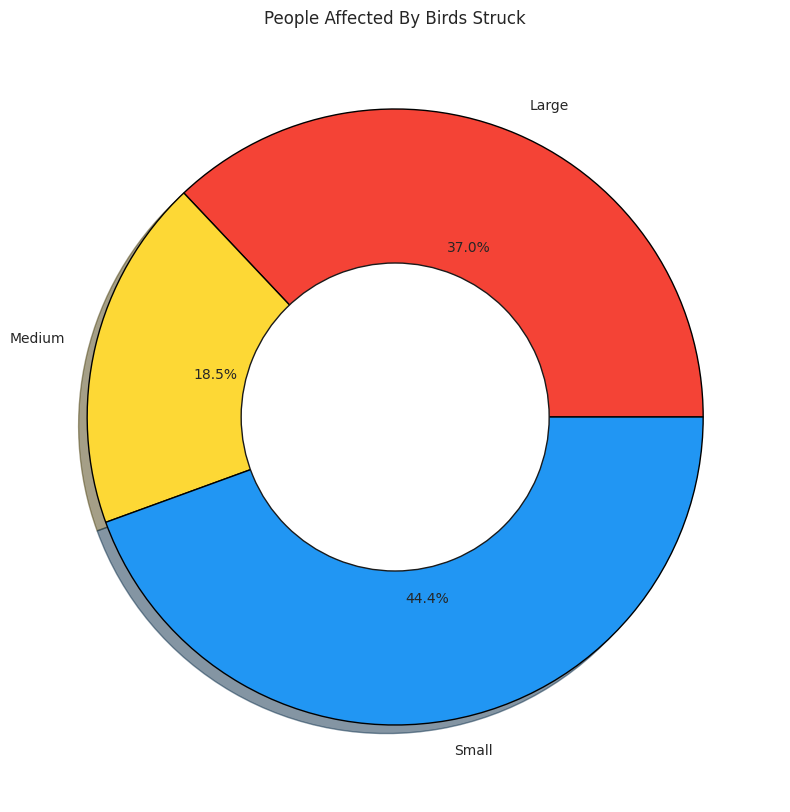

In [ ]:
# People affected by strikes
plt.figure(figsize=(20,10))
colors=['#F44336','#FDD835','#2196F3']
plt.pie(Size['Number of people injured'],labels=Size['Wildlife: Size'], radius=1,
autopct='%0.1f%%',
colors=colors,

shadow=True,
labeldistance=1.1,textprops={'fontsize':10,},
wedgeprops={'linewidth':1,'edgecolor':'#000000'})

plt.pie([1],radius=0.5,colors='w',wedgeprops={'edgecolor':'k'})
plt.title('People Affected By Birds Struck',
fontsize=12,loc='center')
plt.show()
# shows the Donut chart with the people affected by the different bird species struck as the figure is wide when the bird species was "Large" with "47.6%" and sum is 10.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv('/content/Bird Strikes data.xlsx - Bird Strikes.csv', index=False)     #saving the cleaned dataset

# Conclusion
The analysis of bird strike data highlights a critical balance between safety and wildlife conservation. As
strikes pose risks to both aircraft and birds, it is imperative to prioritize sustainable practices to protect avian
species. Without intervention, we risk not only endangering these species but potentially leading them to
extinction. Proactive measures must be taken to safeguard their populations for the ecological balance and
the well-being of our shared environment.The warnings given to the pilots also play important role in the strikes.
It is possible that due to such warnings strikes might also be avoided.